In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import sys

# load the dataset
data_path = 'C:\\Users\\gpric\\Downloads/cancer.csv'
cr_df = pd.read_csv(data_path)
cr_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
data_path2 = 'C:\\Users\\gpric\\Downloads/Housing.csv'
housing = pd.read_csv(data_path2)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
#replave Benign diagnosis to 0 and Malignant to 1
cr_df['diagnosis'].replace('B', 0, inplace=True)
cr_df['diagnosis'].replace('M', 1, inplace=True)
#Make sure its working
cr_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#set variables

x = cr_df.drop(columns=['diagnosis']) 
y = cr_df['diagnosis']


x = cr_df.iloc[:, 2:].values
#select only second columb values as integers
y = cr_df.iloc[:, 1].values.astype(int)

In [5]:

#define SVM_train
def svm_train(x, y, kernel, K):
    
    # Initialize lists to store metrics
    accuracies = []
    precisions = []
    recalls = []
    results = []
    best_K = 0
    highest_accuracy = 0

    #evaluate performance at different K values
    for K in K:
        # Apply PCA
        pca = PCA(n_components=K)
        pDf = pd.DataFrame(data=pca.fit_transform(x))
        X = pDf
    
        # 80/20 Train/Test split
        x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=42)
        
        #classification with variable kernel function
        classifier = SVC(kernel=kernel, C=3)
        classifier.fit(x_train, y_train)
    
        x_train_pca = pca.fit_transform(x_train)
        x_test_pca = pca.transform(x_test)
    
        #predict test set
        y_pred = classifier.predict(x_test)
    
        #find accuracy, precision, and recall of prediction
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
    
        #appending above metrics
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        results.append((accuracy, K))
        
        #ensure that K has the highest accuracy
        highest_accuracy, best_K = max(results, key=lambda x: x[0])

    return accuracies, precisions, recalls, highest_accuracy, best_K


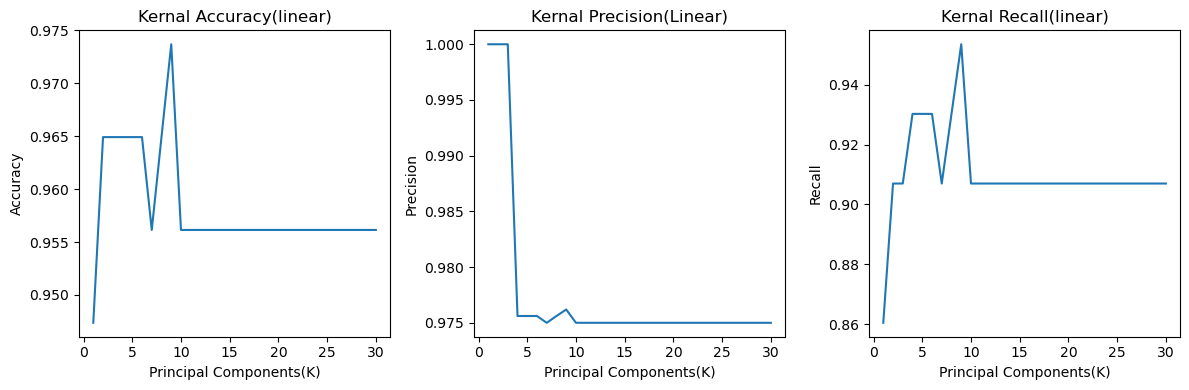

Best Number K(Linear): 9
Highest Accuracy(Linear): 0.9736842105263158


In [9]:
#test and plot accuracy, precision, and recall at different K values
K = list(range(1, 31))

accuracy, precision, recall, highest_acc, k_val = svm_train(x, y, 'linear', K)
#set plot size
plt.figure(figsize=(12, 4))

#make 3 subplots so it looks nice
plt.subplot(1, 3, 1)
plt.plot(K, accuracy)
plt.title('Kernal Accuracy(linear)')
plt.xlabel('Principal Components(K)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(K, precision)
plt.title('Kernal Precision(Linear)')
plt.xlabel('Principal Components(K)')
plt.ylabel('Precision')

plt.subplot(1, 3, 3)
plt.plot(K, recall)
plt.title('Kernal Recall(linear)')
plt.xlabel('Principal Components(K)')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

print(f'Best Number K(Linear): {k_val}')
print(f'Highest Accuracy(Linear): {highest_acc}')

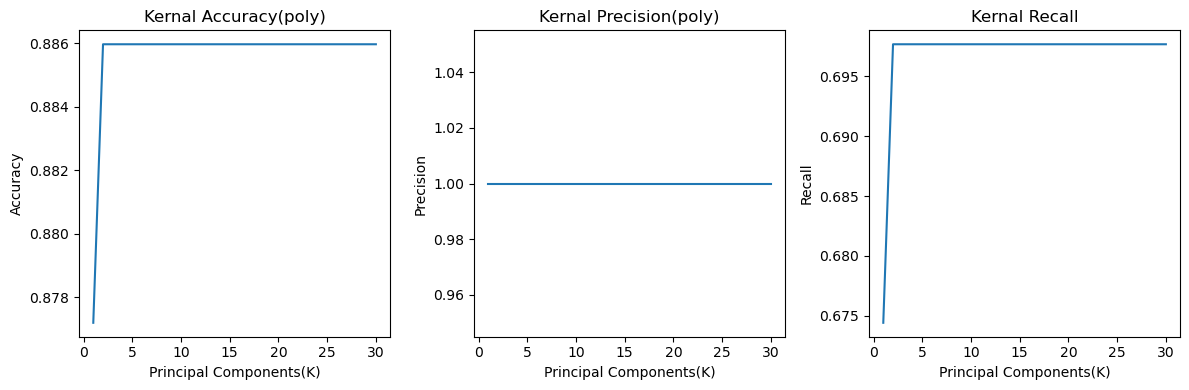

Best Number K(poly): 2
Highest Accuracy(poly): 0.8859649122807017


In [7]:
K = list(range(1, 31))

accuracy, precision, recall, highest_acc, k_val = svm_train(x, y, 'poly', K)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(K, accuracy)
plt.title('Kernal Accuracy(poly)')
plt.xlabel('Principal Components(K)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(K, precision)
plt.title('Kernal Precision(poly)')
plt.xlabel('Principal Components(K)')
plt.ylabel('Precision')

plt.subplot(1, 3, 3)
plt.plot(K, recall)
plt.title('Kernal Recall')
plt.xlabel('Principal Components(K)')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

print(f'Best Number K(poly): {k_val}')
print(f'Highest Accuracy(poly): {highest_acc}')

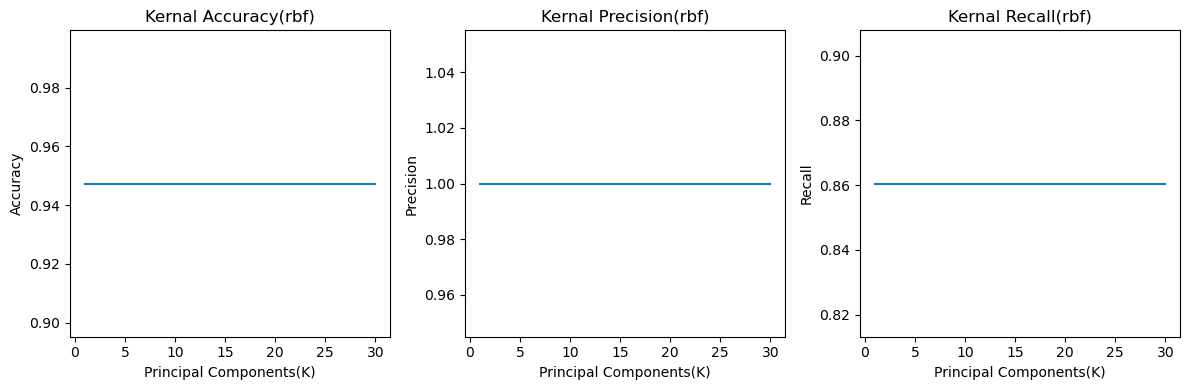

Best Number K(rbf): 1
Highest Accuracy(rbf): 0.9473684210526315


In [8]:
K = list(range(1, 31))

accuracy, precision, recall, highest_acc, k_val = svm_train(x, y, 'rbf', K)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(K, accuracy)
plt.title('Kernal Accuracy(rbf)')
plt.xlabel('Principal Components(K)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(K, precision)
plt.title('Kernal Precision(rbf)')
plt.xlabel('Principal Components(K)')
plt.ylabel('Precision')

plt.subplot(1, 3, 3)
plt.plot(K, recall)
plt.title('Kernal Recall(rbf)')
plt.xlabel('Principal Components(K)')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

print(f'Best Number K(rbf): {k_val}')
print(f'Highest Accuracy(rbf): {highest_acc}')

ValueError: x and y must be the same size

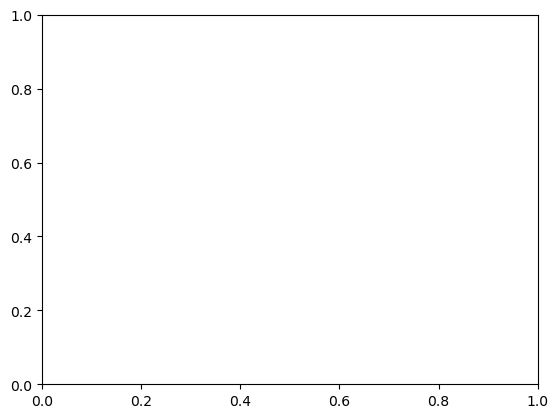

In [12]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

###########
#unfinished
###########
# Generate sample data
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = housing['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add noise to targets



# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)


# Look at the results
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()